# Click or not click on the Advertisement.

It's advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

El set de datos consiste en las siguientes características.

* 'Daily Time Spent on Site': minutos gastados en el sitio por el consumidor.
* 'Age': Edad del consumidor en años.
* 'Area Income': Promedio del ingreso en el área geográfica del consumidor.
* 'Daily Internet Usage': Promedio de los minutos que navega en internet el consumidor.
* 'Ad Topic Line': Titulo del anuncio.
* 'City': Ciudad del consumidor.
* 'Male': Si el consumidor es hombre (1) o mujer (0).
* 'Country': País del consumidor.
* 'Timestamp': Hora en la que el consumidor hizo click en la publicidad o cerro la ventana.
* 'Clicked on Ad': 0 o 1 indican si hizo click en el anuncio.

In [1]:
# Importamos las librerias necesarias:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importamos los datos a partir de un archivo csv

ad_data= pd.read_csv('advertising.csv')

In [3]:
#Vamos a revisar el encabezado de nuestro DataFrame
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#Revisamos la cantidad de filas con valores no nulos
ad_data.info()
#Vemos que no tenemos columnas vacias, por lo que consideramos que es un set limpio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()
#Vemosla descripción de los datos.
#Es importante notar que por el promedio de los clicks en la publicidadl, se ve que la mitad hace click y la otra no


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Exploratory Data Analysis (ETL)

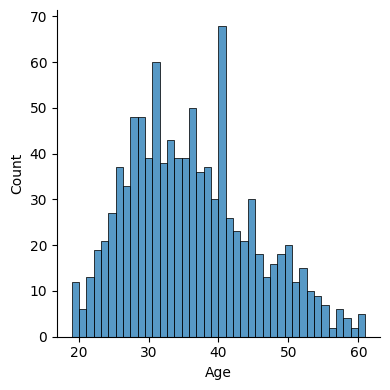

In [6]:
#Vamos a hacer un histograma de la distribución de las personas según la edad.

sns.displot(ad_data, x='Age', bins= 40, height=4.)
#Vemos que esta distribuida cerca de los treinta años, con un pico en los 40s

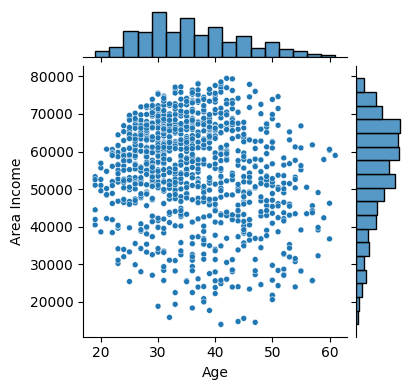

In [7]:
#Vamos a crear un  jointplot para ver como se relaciona la edad y el ingreso según el área.
sns.jointplot(ad_data, x='Age', y='Area Income', height= 4, size=1,legend=False)

#vemos que parece no haber una relación direccta, aunque los más pequeños tienden a tener menos ingresos
#y las personas entre 30 y 40 años tienen mayor ingreso.

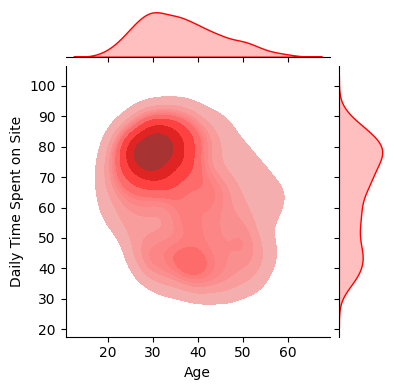

In [8]:
#Vamos a crear un jointplot mostrando las distribuciones del 'Daily Time spent on site' vs. 'Age'.

sns.jointplot(ad_data, x='Age', y='Daily Time Spent on Site', height=4, kind='kde', color='red', fill=True)

#Aquí vemos que las personas que rondan los 30 años, pasan mas tiempo en el sitio

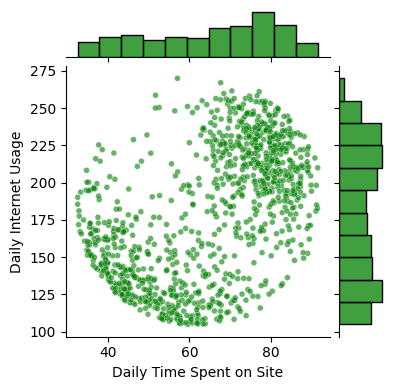

In [9]:
# Ahora vamos a hacer lo mismo pero con el tiempo en el sitio y el tiempo en internet

sns.jointplot(ad_data, x='Daily Time Spent on Site', y= 'Daily Internet Usage', color='green', alpha= .6, height=4, size=2, legend=False)

#Aquí vemos la relación entre los minutos que tarda en el sitio y el uso de internet
#Es curioso porque gente que tarda entre 50m y 70m, tienen menos uso de internet qhe los de 40

C:\Users\galla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\galla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves
C:\Users\galla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

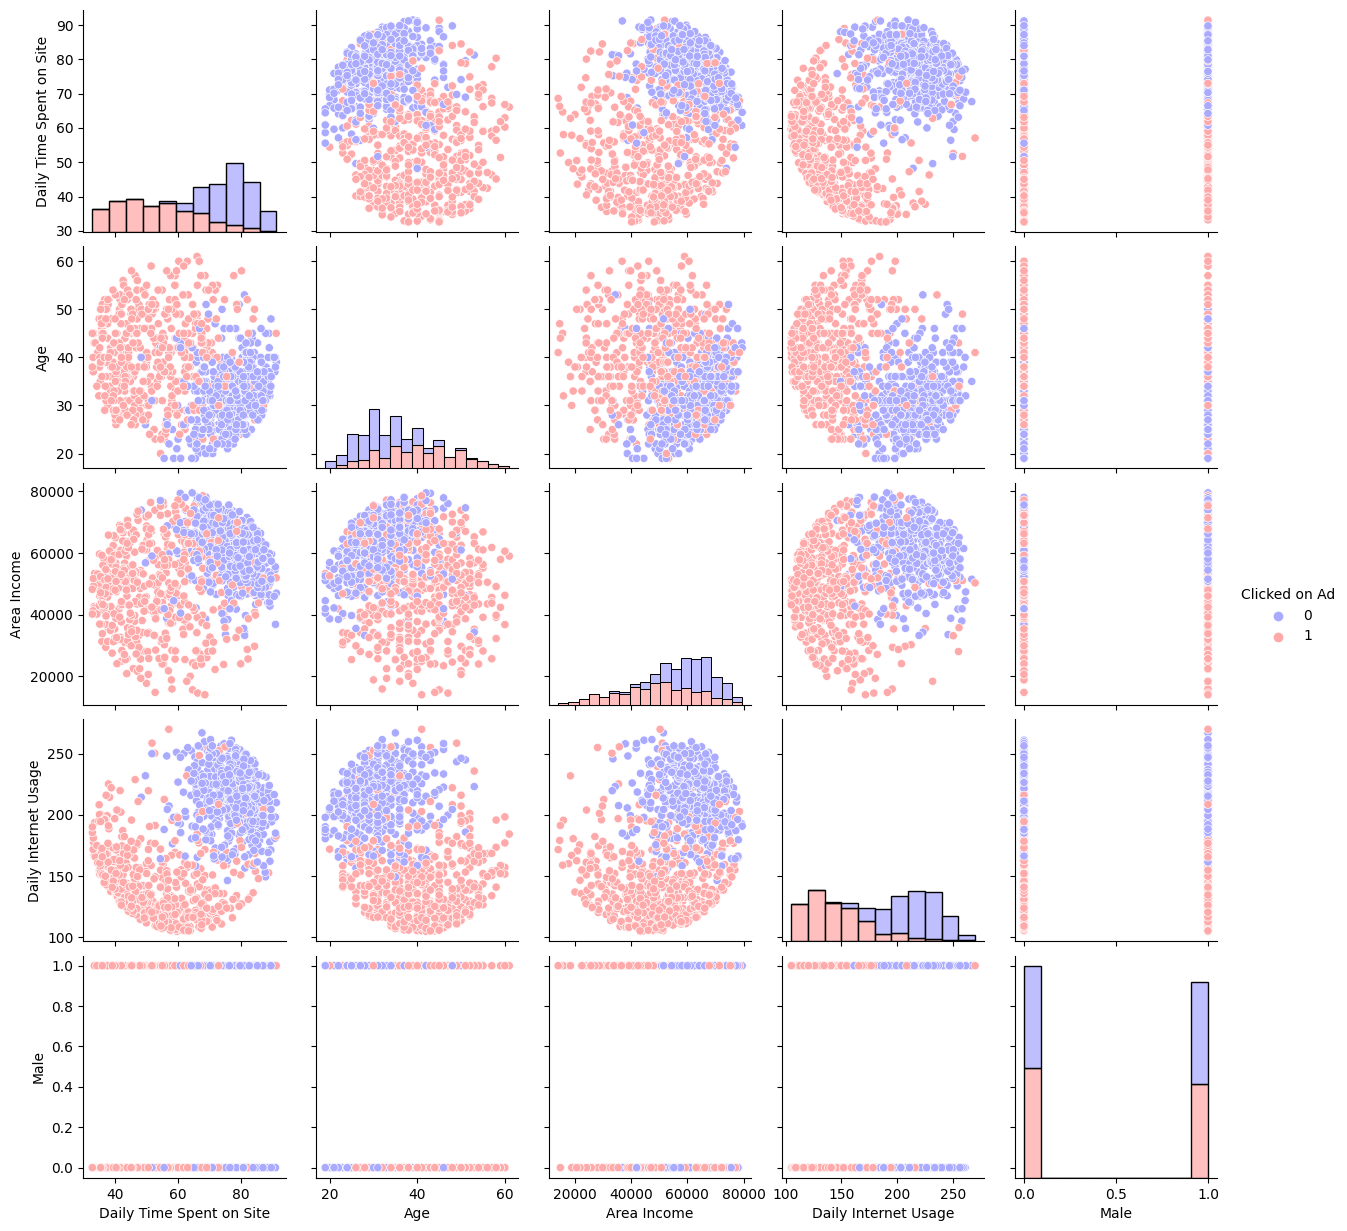

In [10]:
# Finalmente creamos un pairplot con una distinción definida por la columna 'Clicked on Ad'

sns.pairplot(ad_data, hue= 'Clicked on Ad', diag_kind= 'hist' ,palette='bwr',  diag_kws={'multiple': 'stack'})

# Regresión logistica

In [17]:
#Ahora dividimos en nuestras variables predictoras, y nuestra variable a predecir, que en este caso
#nos interesa saber si va hacer click o no en la publicidad.

X.drop(['Timestamp', 'City', 'Ad Topic Line', 'Country'], axis=1, inplace= True)
y= ad_data['Clicked on Ad']



In [19]:
#Vamos a importar la libreria que nos permite seccionar los datos 
#en datos de entrenamiento y de testeo.

from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

#Ahora vamos a importar la herramienta de regresión logistica

In [22]:
log_model_ad=LogisticRegression()

In [23]:
# Ahora vamos a hacer el fit con nuestros datos de entrenamiento.

log_model_ad.fit(X_train,y_train)

LogisticRegression()

# Predicciones y Evalución

In [25]:
# Ahora vamos a hacer la preddición de nuestros datos testeo 

predict = log_model_ad.predict(X_test)

In [27]:
# Vamos a importar la libreria que nos permite hac
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print('Matriz de confusión:')
print('\n')
print(confusion_matrix(y_test, predict))
print('\n')
print('Reporte de clasificación:')
print('\n')
print(classification_report(y_test,predict))

Matriz de confusión:


[[156   6]
 [ 25 143]]


Reporte de clasificación:


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Vemos que la matríz de confusión, nos da que tenemos 156 verdaderos negativos,
## 143 verdaderos positivos, mientras que tenemos tenemos 25 falsos positivos
## y 6 falsos negativos

Text(0.5, 1.0, 'Matriz de confusión')

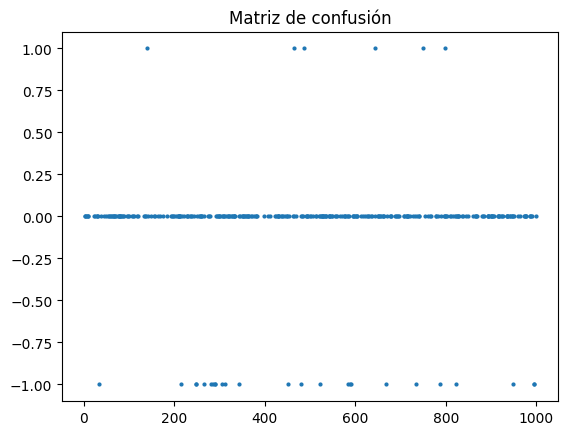

In [35]:

plt.plot(predict - y_test, 'o', ms=2)
plt.title('Matriz de confusión')

#En esta gráfica los puntos en y= 0 representan los valores que la predicción correspondio a la 
# variable predecida en los datos de testeo.